<a href="https://colab.research.google.com/github/quentindubois-epitech/-Applied-Predictive-Analytics-Assessment/blob/main/Applied_Predictive_Analytics_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Success of a movie based on their caracteristic with machine learning

## 1. <a name="1">Reading the dataset</a>
Get the data by reading the file at https://github.com/quentindubois-epitech/-Applied-Predictive-Analytics-Assessment/blob/main/movies.csv.


In [ ]:
!pip install transformers torch scikit-learn nltk==3.6.3
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

import plotly.express as px # interactive plots
from plotly.subplots import make_subplots

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA, KernelPCA

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/quentindubois-epitech/-Applied-Predictive-Analytics-Assessment/main/movies.csv'

df = pd.read_csv(url)

## 2. <a name="2">Data preparation</a>
We drop the NAs data from the dataset.

In [ ]:
df = df.dropna().copy()

We create a new column in the dataset called success if the revenue is higher than the budget.

In [ ]:
df['success'] = df.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)

Let's look at the first five rows in the datasets.

In [ ]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1


We check the number of data for 'success' category.

In [ ]:
df["success"].value_counts()

1    3677
0    1744
Name: success, dtype: int64

Drop rows that doesn't have a full date.

In [ ]:
df.drop(df[df['released'].apply(lambda x: len(x.split('(')[0].split()))!= 3].index, inplace=True)

We convert 'released' to datetime type.

In [ ]:
df['released'] = df['released'].apply(lambda x: x.split('(')[0])
df['released'] = pd.to_datetime(df['released'])

# get month, day, and day of the week from released
df['month'] = df['released'].dt.month
df['day'] = df['released'].dt.day
df['week_day'] = df['released'].dt.dayofweek

# reorder columns
df = df[['name', 'rating', 'genre', 'released', 'year', 'month', 'day',
                          'week_day', 'score', 'votes', 'director', 'writer', 'star',
                          'country', 'budget', 'gross', 'company', 'runtime', 'success']].copy()
df.head()

,name,rating,genre,released,year,month,day,week_day,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980-06-13,1980,6,13,4,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980-07-02,1980,7,2,2,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1980,6,20,4,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1
3,Airplane!,PG,Comedy,1980-07-02,1980,7,2,2,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1
4,Caddyshack,R,Comedy,1980-07-25,1980,7,25,4,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1


We have too many unique values in columns: 'director', 'writer', 'star', and 'company'. A model won't be able to learn any useful information from them. We need to transform these variables.

In [ ]:
# split columns into numerical and categorical (exclude the PassengerId)
float_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'float64'].index.tolist()
int_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'object'].index.tolist()
num_cols = float_cols + int_cols
binary = [x for x in num_cols if len(df[x].unique()) == 2]
num_not_binary = [x for x in num_cols if x not in binary]

print("Numerical variables: ", num_cols)
print("Numerical continuous variables: ", float_cols)
print("Numerical discrete variables: ", int_cols)
print("Numerical and not binary variables: ", num_not_binary)
print("Binary variables: ", binary)
print("Categorical variables: ", cat_cols)

Numerical variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year', 'month', 'day', 'week_day', 'success']
Numerical continuous variables:  ['score', 'votes', 'budget', 'gross', 'runtime']
Numerical discrete variables:  ['year', 'month', 'day', 'week_day', 'success']
Numerical and not binary variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year', 'month', 'day', 'week_day']
Binary variables:  ['success']
Categorical variables:  ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']


We create histograms for all numerical variables.

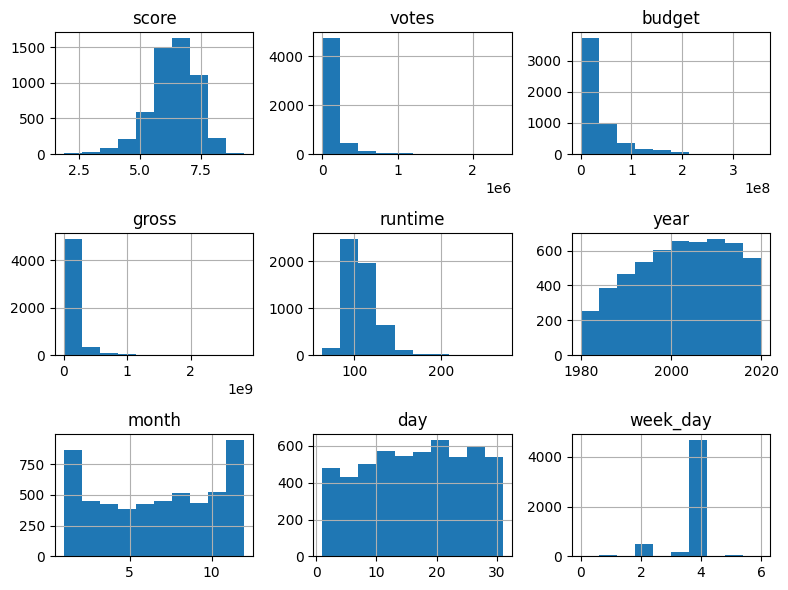

In [ ]:
fig, axList = plt.subplots(3, 3, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(8, 6)

for i,ax in enumerate(axList[0:len(num_not_binary)]):
    df.hist(column = num_not_binary[i], bins = 10, ax=ax)

fig.tight_layout()
fig.show()

We create bar plots for categorical data.

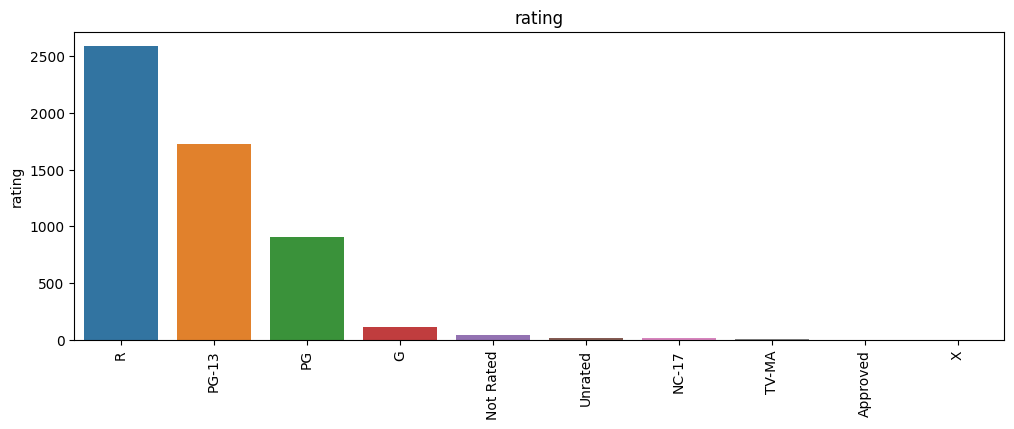

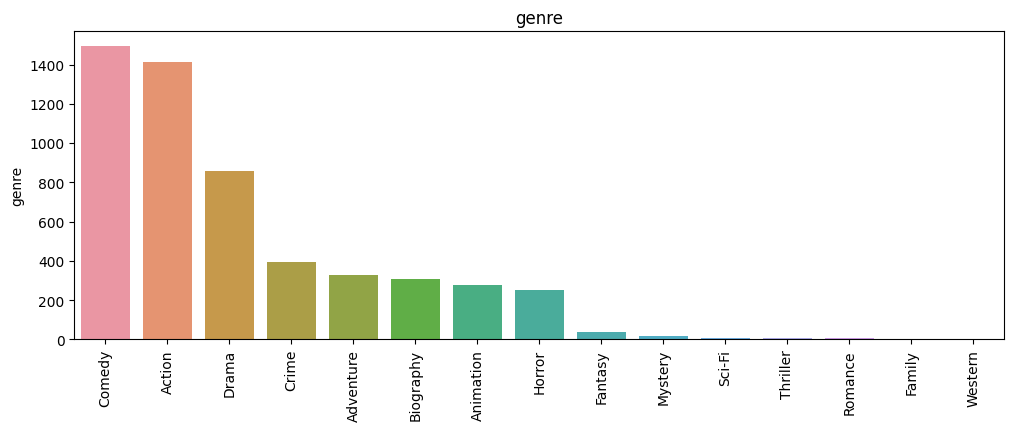

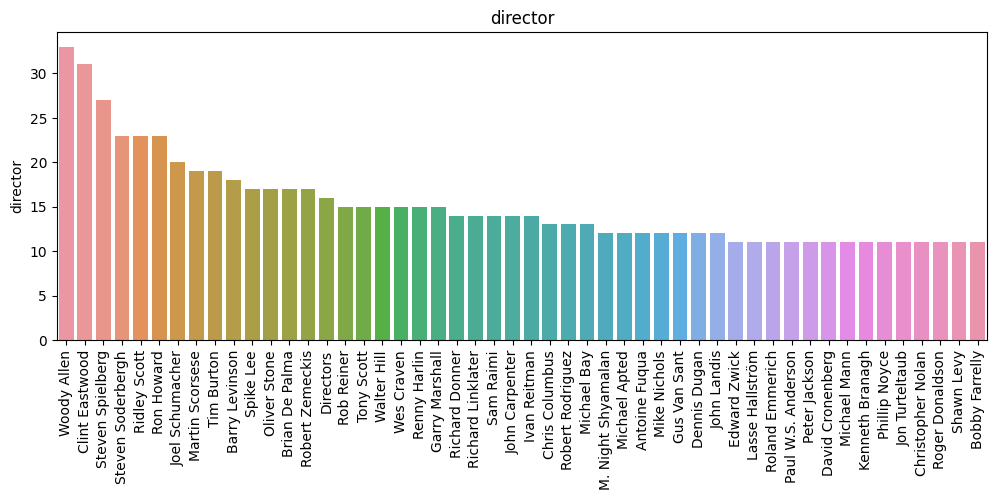

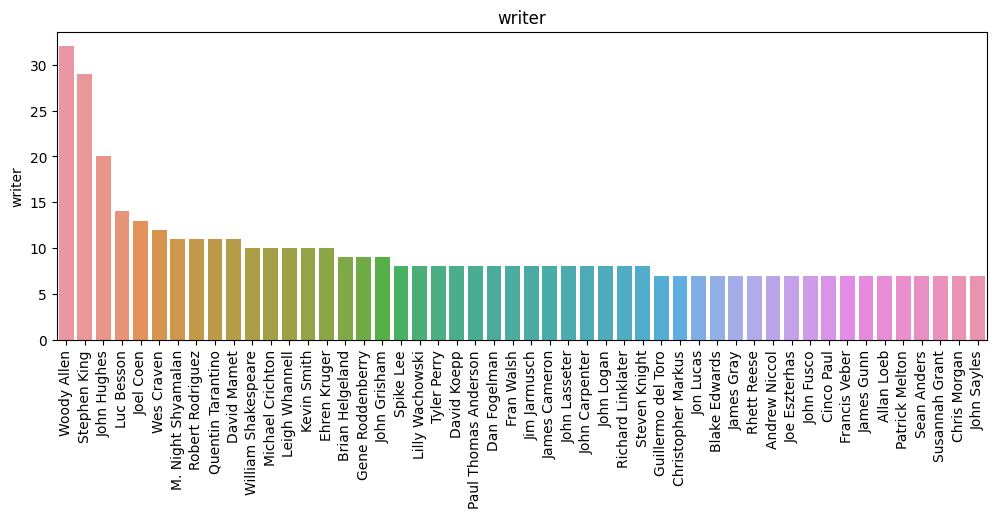

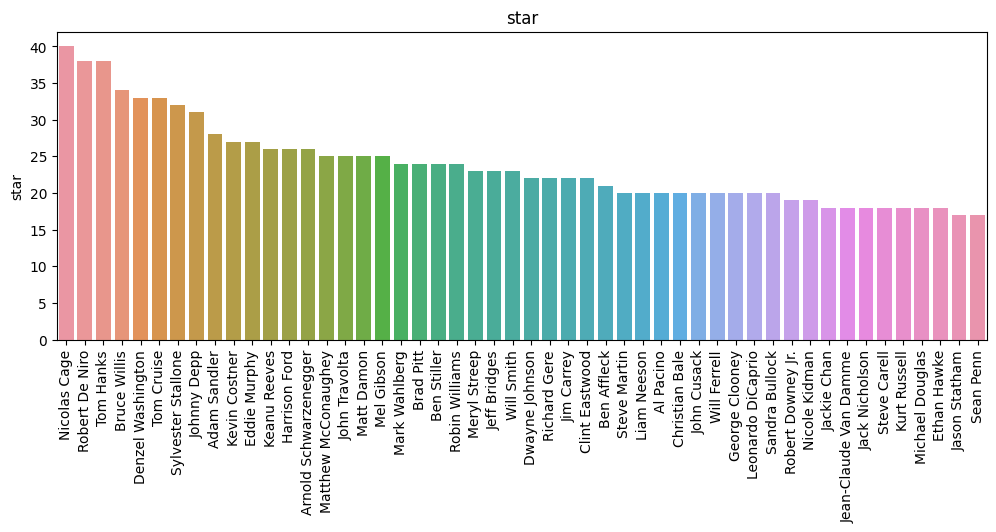

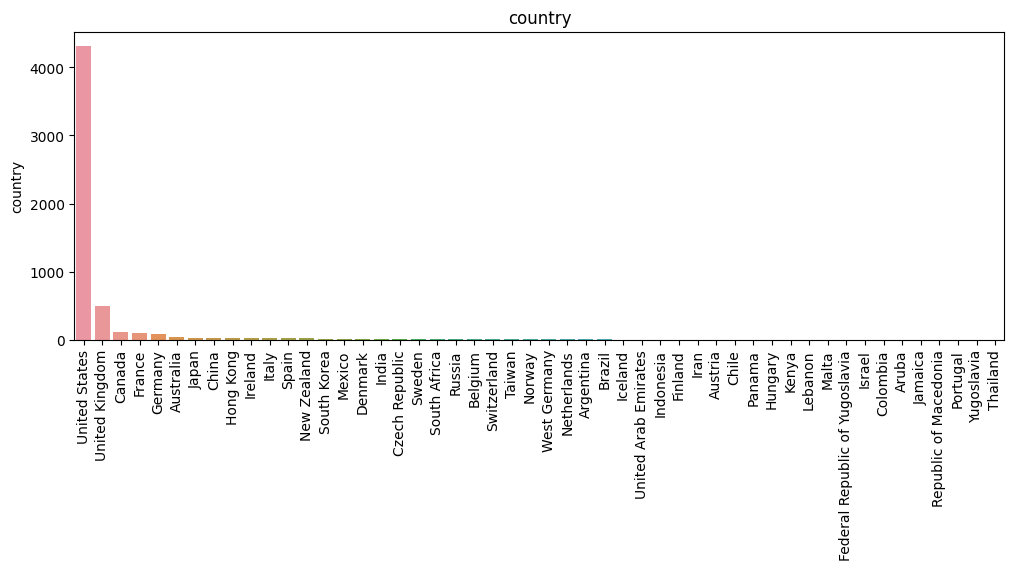

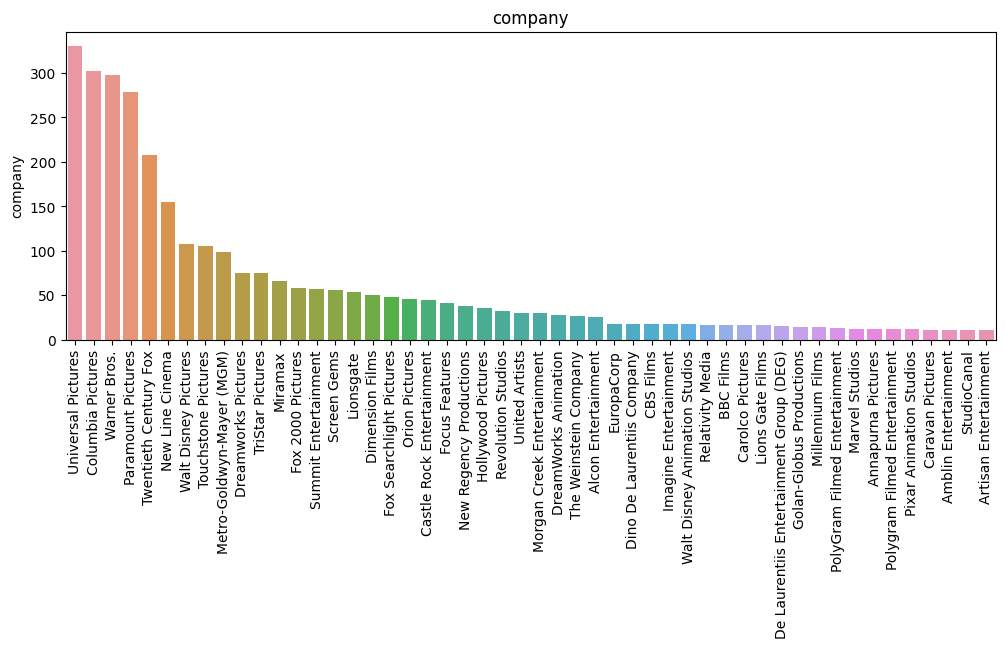

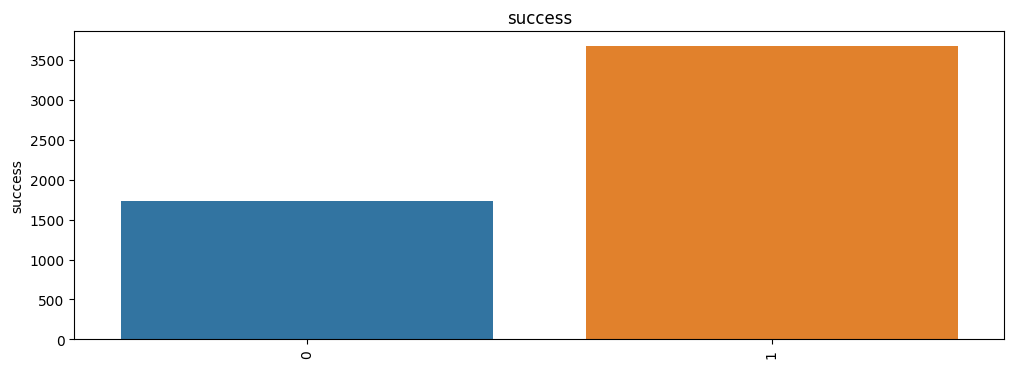

In [ ]:
for i in cat_cols + binary:
    plt.figure(figsize = (12,4))
    sns.barplot(x = df[i].value_counts().index[0:50],
                y = df[i].value_counts()[0:50]).set_title(i)
    plt.xticks(rotation='vertical')
    plt.show()

## 3. <a name="3">Train - Data cleaning</a>
We clean the rating column for more lisibility.

In [ ]:
to_replace = {'TV-MA': 'NC-17',
              'X': 'NC-17',
              'Unrated': 'Not Rated',
              'Approved': 'PG-13'}
df['rating'] = df['rating'].replace(to_replace = to_replace)
df['rating'].value_counts(normalize=True)

R            0.478454
PG-13        0.319956
PG           0.167376
G            0.020529
Not Rated    0.010912
NC-17        0.002774
Name: rating, dtype: float64

We clean the genre column for more lisibility.

In [ ]:
count_genre = df['genre'].value_counts()
count_genre

# create a list of main genres
main_genres = []
for i in range(len(count_genre)):
    if count_genre[i] > 10:
        main_genres.append(count_genre.index[i])
main_genres

# put all genres that are not in the list in the class 'other'
df['genre'] = df['genre'].apply(lambda x: 'Other' if x not in main_genres else x)
print(df['genre'].value_counts(normalize=True))
pd.pivot_table(df, index = 'success', columns = 'genre', values = 'name', aggfunc ='count')

Comedy       0.276308
Action       0.261513
Drama        0.158868
Crime        0.073238
Adventure    0.060477
Biography    0.057333
Animation    0.051230
Horror       0.046421
Fantasy      0.007398
Other        0.004254
Mystery      0.002959
Name: genre, dtype: float64


genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Other
success,,,,,,,,,,,
0,384,112,43,110,494,173,340,11,50,5,10
1,1030,215,234,200,1000,223,519,29,201,11,13


We clean the genre country for more lisibility.

In [ ]:
count_country = df['country'].value_counts().head(20)
count_country

# create a list of main countries
main_countries = []
for i in range(len(count_country)):
    if count_country[i] > 25:
        main_countries.append(count_country.index[i])
main_countries

# put all countries that are not in the list in the class 'other'
df['country'] = df['country'].apply(lambda x: 'Other' if x not in main_countries else x)
pd.pivot_table(df, index = 'success', columns = 'country', values = 'name' ,aggfunc ='count')

country,Australia,Canada,China,France,Germany,Japan,Other,United Kingdom,United States
success,,,,,,,,,
0,15,57,3,48,40,8,74,194,1293
1,27,54,23,56,42,20,140,296,3017


We create new dataframe before adding new columns for experience

In [ ]:
df = df.reset_index(drop=True).copy()

# create empty columns
df['director_experience'] = np.nan
df['writer_experience'] = np.nan
df['star_experience'] = np.nan
df['company_experience'] = np.nan

# calculate experience and save calculated values in new columns
for i in range(len(df)):
    df.loc[i, 'director_experience'] = len(df[(df['director'] == df.loc[i]['director'])
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'writer_experience'] = len(df[(df['writer'] == df.loc[i]['writer'])
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'star_experience'] = len(df[(df['star'] == df.loc[i]['star'])
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'company_experience'] = len(df[(df['company'] == df.loc[i]['company'])
                                                  & (df['released'] < df.loc[i]['released'])])

# reorder columns
df = df[['name', 'rating', 'genre', 'released', 'year', 'month', 'day',
                          'week_day', 'score', 'votes', 'director', 'director_experience',
                          'writer', 'writer_experience', 'star', 'star_experience', 'country',
                          'budget', 'gross', 'company', 'company_experience', 'runtime', 'success']].copy()
df.head()

,name,rating,genre,released,year,month,day,week_day,score,votes,...,writer_experience,star,star_experience,country,budget,gross,company,company_experience,runtime,success
0,The Shining,R,Drama,1980-06-13,1980,6,13,4,8.4,927000.0,...,0.0,Jack Nicholson,0.0,United Kingdom,19000000.0,46998772.0,Warner Bros.,1.0,146.0,1
1,The Blue Lagoon,R,Adventure,1980-07-02,1980,7,2,2,5.8,65000.0,...,0.0,Brooke Shields,0.0,United States,4500000.0,58853106.0,Columbia Pictures,0.0,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1980,6,20,4,8.7,1200000.0,...,0.0,Mark Hamill,0.0,United States,18000000.0,538375067.0,Lucasfilm,0.0,124.0,1
3,Airplane!,PG,Comedy,1980-07-02,1980,7,2,2,7.7,221000.0,...,0.0,Robert Hays,0.0,United States,3500000.0,83453539.0,Paramount Pictures,2.0,88.0,1
4,Caddyshack,R,Comedy,1980-07-25,1980,7,25,4,7.3,108000.0,...,0.0,Chevy Chase,1.0,United States,6000000.0,39846344.0,Orion Pictures,0.0,98.0,1


We make histograms for the new columns

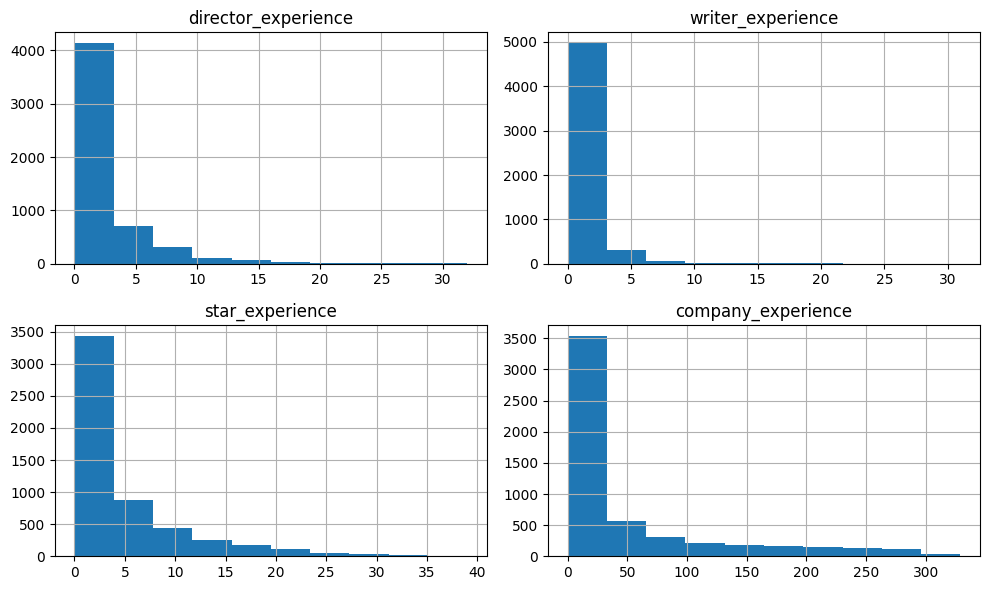

In [ ]:
new_columns = ['director_experience', 'writer_experience', 'star_experience', 'company_experience']

# build histograms
fig, axList = plt.subplots(2, 2, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(10, 6)

for i,ax in enumerate(axList[0:len(new_columns)]):
    df.hist(column = new_columns[i], bins = 10, ax=ax)

fig.tight_layout()
fig.show()

In [ ]:
# Assuming your DataFrame is named df
selected_columns = ['rating', 'genre', 'year', 'director_experience', 'writer_experience', 'star_experience', 'country', 'budget', 'company_experience', 'runtime', 'success']
df_selected = df[selected_columns]

# Display the first few rows of the DataFrame with specified columns
df_selected.head()

,rating,genre,year,director_experience,writer_experience,star_experience,country,budget,company_experience,runtime,success
0,R,Drama,1980,0.0,0.0,0.0,United Kingdom,19000000.0,1.0,146.0,1
1,R,Adventure,1980,0.0,0.0,0.0,United States,4500000.0,0.0,104.0,1
2,PG,Action,1980,0.0,0.0,0.0,United States,18000000.0,0.0,124.0,1
3,PG,Comedy,1980,0.0,0.0,0.0,United States,3500000.0,2.0,88.0,1
4,R,Comedy,1980,0.0,0.0,1.0,United States,6000000.0,0.0,98.0,1


## 4. <a name="4">Train - Define target and features</a>
We define the target and predicting features

In [ ]:
target = 'success'
features = ['rating', 'genre', 'year', 'director_experience', 'writer_experience',
            'star_experience', 'country', 'budget', 'company_experience', 'runtime']

X = df[features]
y = df[target]

# separate features into numerical and categorical
cat_cols = ['rating', 'genre', 'country']
num_cols = [x for x in list(X.columns) if x not in cat_cols]

# calculate skewness scores for numerical features
skewness = X[num_cols].skew(axis=0, numeric_only = True).to_dict()

# define skewness threshold
skewness_threshold = 0.5

# create lists of columns that require normalizing
skewed_cols = []
for i in skewness:
    if abs(skewness[i]) > skewness_threshold:
        skewed_cols.append(i)

# print results
for i in skewed_cols:
    print(f"Column {i} is skewed: score {round(skewness[i], 2)}")

Column director_experience is skewed: score 2.87
Column writer_experience is skewed: score 5.69
Column star_experience is skewed: score 2.08
Column budget is skewed: score 2.44
Column company_experience is skewed: score 1.8
Column runtime is skewed: score 1.42


## 5. <a name="5">Train - Validation Split</a>
Let's split our dataset into training (80%) and validation (20%).

In [ ]:
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.2,
                                          random_state=324)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

# Create the dataframes for train and test
X_train = X.loc[train_idx,]
y_train = y.loc[train_idx,]

X_test  = X.loc[test_idx,]
y_test  = y.loc[test_idx,]

# create transformer for preprocessing numerical and categorical features
column_trans = ColumnTransformer([
    ('skewness', PowerTransformer(), skewed_cols),
    ('encoding', OneHotEncoder(drop = 'first', dtype = 'int'), cat_cols)
], remainder = 'passthrough')

X_train_norm = column_trans.fit_transform(X_train)
X_train_norm.shape

# KFold for Grid Search
skf = StratifiedKFold(n_splits = 6)

## 6. <a name="6">Train - Logistic Regression</a>
Logistic Regression

In [ ]:
estimator_lr = Pipeline([("preprocessing", column_trans),
                         ("scaling", MinMaxScaler()),
                         ("sampling", ADASYN(sampling_strategy = 'minority', random_state = 42)),
                         ("clasifier", LogisticRegression(class_weight = 'balanced', solver='liblinear'))])

params_lr = {
    'sampling__n_neighbors': list(range(2, 6)),
    'clasifier__penalty': ['l2'],
    'clasifier__C': np.geomspace(0.1, 5, 10)
}

# do grid search
grid_lr = GridSearchCV(estimator_lr, params_lr,
                       scoring = 'f1',
                       cv = skf,
                       n_jobs = -1, verbose = True)
grid_lr.fit(X_train, y_train.values.ravel())

Fitting 6 folds for each of 40 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('skewness',
                                                                         PowerTransformer(),
                                                                         ['director_experience',
                                                                          'writer_experience',
                                                                          'star_experience',
                                                                          'budget',
                                                                          'company_experience',
                                                                          'runtime']),
                                                                        ('encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       dt...
                                        ADASYN(random_state=42,
                                               sampling_strategy='minority')),
                                       ('clasifier',
                                        LogisticRegression(class_weight='balanced',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'clasifier__C': array([0.1       , 0.15444521, 0.23853323, 0.36840315, 0.56898102,
       0.87876393, 1.35720881, 2.096144  , 3.23739401, 5.        ]),
                         'clasifier__penalty': ['l2'],
                         'sampling__n_neighbors': [2, 3, 4, 5]},
             scoring='f1', verbose=True)

In [ ]:
# function to plot confusion matrix
def vis_conf_matrix(conf_martix, model_name):
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf_martix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf_martix.flatten()/np.sum(conf_martix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    _, ax = plt.subplots(figsize = (6,6))
    ax = sns.heatmap(conf_martix, annot=labels, fmt = '',
                     annot_kws = {"size": 20, "weight": "bold"}, cmap = 'Blues')
    labels = ['False', 'True']
    ax.set_title('Confusion Matrix for {}'.format(model_name), fontsize = 15)
    ax.set_xticklabels(labels, fontsize = 10)
    ax.set_yticklabels(labels, fontsize = 10)
    ax.set_xlabel('Prediction', fontsize = 15)
    ax.set_ylabel('Ground Truth', fontsize = 15)

              precision    recall  f1-score   support

           0       0.45      0.62      0.52       347
           1       0.78      0.65      0.71       735

    accuracy                           0.64      1082
   macro avg       0.62      0.63      0.62      1082
weighted avg       0.68      0.64      0.65      1082

Accuracy (validation):  0.6377079482439926
Precision (validation):  0.7816091954022989
Recall (validation):  0.6476190476190476
F1 (validation):  0.7083333333333334


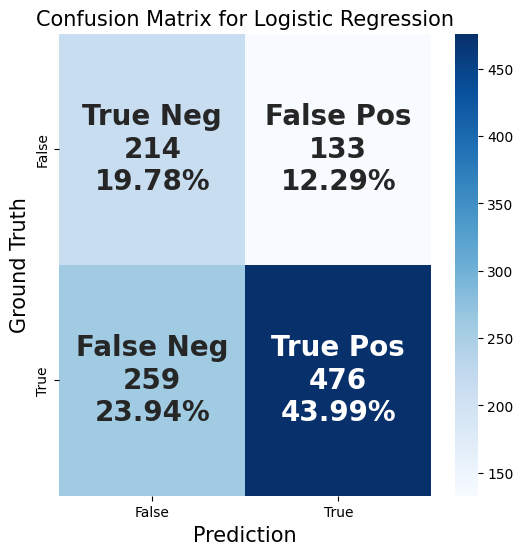

In [ ]:
# predict target values
y_pred_lr = grid_lr.predict(X_test)

# Plot confusion matrix
c_matrix_lr = confusion_matrix(y_test, y_pred_lr)
vis_conf_matrix(c_matrix_lr, "Logistic Regression")

print(classification_report(y_test, y_pred_lr))
print('Accuracy (validation): ', accuracy_score(y_test, y_pred_lr))
print('Precision (validation): ', precision_score(y_test, y_pred_lr))
print('Recall (validation): ', recall_score(y_test, y_pred_lr))
print('F1 (validation): ', f1_score(y_test, y_pred_lr))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

# Assuming X_train and y_train are your training data
# Assuming you have defined column_trans and other necessary variables

# Define Logistic Regression model
estimator_lr = Pipeline([
    ("preprocessing", column_trans),
    ("sampling", ADASYN(sampling_strategy='minority', random_state=42)),
    ("classifier", LogisticRegression(class_weight='balanced', solver='liblinear'))
])

# Define parameters for grid search
params_lr = {
    'sampling__n_neighbors': [2, 3],
    'classifier__penalty': ['l2'],
    'classifier__C': [0.1, 1.0]
}

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with error_score='raise'
grid_lr = GridSearchCV(estimator_lr, params_lr,
                       scoring='f1',
                       cv=skf,
                       n_jobs=-1, verbose=1,
                       error_score='raise')
grid_lr.fit(X_train, y_train.values.ravel())

# Display the best parameters
print("Best Parameters:", grid_lr.best_params_)

# Display the best estimator
print("Best Estimator:", grid_lr.best_estimator_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'sampling__n_neighbors': 3}
Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('skewness',
                                                  PowerTransformer(),
                                                  ['director_experience',
                                                   'writer_experience',
                                                   'star_experience', 'budget',
                                                   'company_experience',
                                                   'runtime']),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int'),
                    

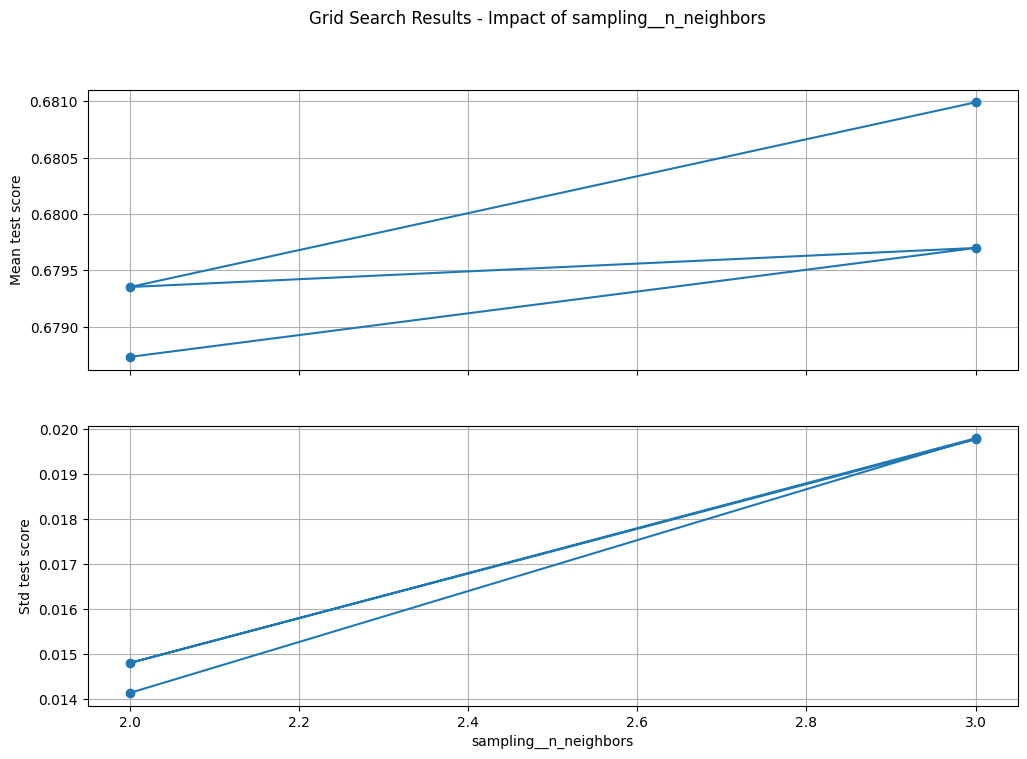

In [ ]:
import matplotlib.pyplot as plt

def plot_grid_search_results(grid_results, param_name, metrics=['mean_test_score'], figsize=(12, 8)):
    n_metrics = len(metrics)

    fig, axes = plt.subplots(n_metrics, 1, figsize=figsize, sharex=True)

    for ax, metric in zip(axes, metrics):
        param_values = [params[param_name] for params in grid_results.cv_results_['params']]
        mean_scores = grid_results.cv_results_[metric]

        ax.plot(param_values, mean_scores, marker='o')
        ax.set_ylabel(metric.replace("_", " ").capitalize())
        ax.grid(True)

    axes[-1].set_xlabel(param_name)
    plt.suptitle(f'Grid Search Results - Impact of {param_name}')

    plt.show()

# Assuming grid_lr is your GridSearchCV object
plot_grid_search_results(grid_lr, 'sampling__n_neighbors', metrics=['mean_test_score', 'std_test_score'])


In [ ]:
scores = pd.DataFrame(data = {'model': ['logistic regression'],
                              'f1': [f1_score(y_test, y_pred_lr)],
                              'accuracy': [accuracy_score(y_test, y_pred_lr)],
                              'precision': [precision_score(y_test, y_pred_lr)],
                              'recall': [recall_score(y_test, y_pred_lr)]})

scores.loc[scores.model == 'logistic regression',
           ['tn', 'fp', 'fn', 'tp']] = np.around(c_matrix_lr.ravel()/np.sum(c_matrix_lr)*100,
                                                 decimals=2)
scores

,model,f1,accuracy,precision,recall,tn,fp,fn,tp
0,logistic regression,0.708333,0.637708,0.781609,0.647619,19.78,12.29,23.94,43.99


## 7. <a name="7">Train - K-nearest neighbors (KNN)</a>
K-nearest neighbors (KNN)

In [ ]:
# K-Nearest Neighbors
estimator_knn = Pipeline([("preprocessing", column_trans),
                          ("scaling", MinMaxScaler()),
                          ("sampling", ADASYN(sampling_strategy = 'minority', random_state = 42)),
                          ("clasifier", KNeighborsClassifier())])

params_knn = {
    'sampling__n_neighbors': [3, 4, 5],
    'clasifier__n_neighbors': [i for i in range(5, 10)],
    'clasifier__weights': ['uniform'],
    'clasifier__algorithm': ['auto'],
    'clasifier__p': [1, 2]
}

grid_knn = GridSearchCV(estimator_knn, params_knn,
                       scoring = 'f1',
                       cv=skf,
                       n_jobs = -1, verbose = 1)
grid_knn.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('skewness',
                                                                         PowerTransformer(),
                                                                         ['director_experience',
                                                                          'writer_experience',
                                                                          'star_experience',
                                                                          'budget',
                                                                          'company_experience',
                                                                          'runtime']),
                                                                        ('encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype...
                                                                          'genre',
                                                                          'country'])])),
                                       ('scaling', MinMaxScaler()),
                                       ('sampling',
                                        ADASYN(random_state=42,
                                               sampling_strategy='minority')),
                                       ('clasifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clasifier__algorithm': ['auto'],
                         'clasifier__n_neighbors': [5, 6, 7, 8, 9],
                         'clasifier__p': [1, 2],
                         'clasifier__weights': ['uniform'],
                         'sampling__n_neighbors': [3, 4, 5]},
             scoring='f1', verbose=1)

In [ ]:
# predict target values
y_pred_knn = grid_knn.predict(X_test)

# Plot confusion matrix
c_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(classification_report(y_test, y_pred_knn))
print('Accuracy (validation): ', accuracy_score(y_test, y_pred_knn))
print('Precision (validation): ', precision_score(y_test, y_pred_knn))
print('Recall (validation): ', recall_score(y_test, y_pred_knn))
print('F1 (validation): ', f1_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.40      0.54      0.46       347
           1       0.74      0.62      0.68       735

    accuracy                           0.59      1082
   macro avg       0.57      0.58      0.57      1082
weighted avg       0.63      0.59      0.61      1082

Accuracy (validation):  0.5942698706099815
Precision (validation):  0.7394822006472492
Recall (validation):  0.6217687074829932
F1 (validation):  0.6755358462675536


In [ ]:
scores = scores.append({'model': 'KNN',
                        'f1': f1_score(y_test, y_pred_knn),
                        'accuracy': accuracy_score(y_test, y_pred_knn),
                        'precision': precision_score(y_test, y_pred_knn),
                        'recall': recall_score(y_test, y_pred_knn)},
                        ignore_index=True)

scores.loc[scores.model == 'KNN',
           ['tn', 'fp', 'fn', 'tp']] = np.around(c_matrix_knn.ravel()/np.sum(c_matrix_knn)*100,
                                                 decimals=2)
scores

<ipython-input-69-ee6d2f96ac36>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model,f1,accuracy,precision,recall,tn,fp,fn,tp
0,logistic regression,0.708333,0.637708,0.781609,0.647619,19.78,12.29,23.94,43.99
1,KNN,0.675536,0.594270,0.739482,0.621769,17.19,14.88,25.69,42.24


## 8. <a name="8">Train - Random Forest</a>
Random Forest

In [ ]:
# Random Forest Classifier
estimator_rf = Pipeline([
    ("preprocessing", column_trans),
    ("sampling", ADASYN(sampling_strategy='minority', random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

params_rf = {
    'sampling__n_neighbors': [2],
    'classifier__n_estimators': [100],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [None],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1]
}

# Grid search for Random Forest
grid_rf = GridSearchCV(estimator_rf, params_rf,
                            scoring='f1',
                            cv=skf,
                            n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('skewness',
                                                                         PowerTransformer(),
                                                                         ['director_experience',
                                                                          'writer_experience',
                                                                          'star_experience',
                                                                          'budget',
                                                                          'company_experience',
                                                                          'runtime']),
                                                                        ('encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype...
                                        ADASYN(random_state=42,
                                               sampling_strategy='minority')),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini'],
                         'classifier__max_depth': [None],
                         'classifier__min_samples_leaf': [1],
                         'classifier__min_samples_split': [2],
                         'classifier__n_estimators': [100],
                         'sampling__n_neighbors': [2]},
             scoring='f1', verbose=1)

In [ ]:
# predict target values
y_pred_rf = grid_rf.predict(X_test)

# Plot confusion matrix
c_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))
print('Accuracy (validation): ', accuracy_score(y_test, y_pred_rf))
print('Precision (validation): ', precision_score(y_test, y_pred_rf))
print('Recall (validation): ', recall_score(y_test, y_pred_rf))
print('F1 (validation): ', f1_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45       347
           1       0.74      0.83      0.79       735

    accuracy                           0.69      1082
   macro avg       0.63      0.61      0.62      1082
weighted avg       0.67      0.69      0.68      1082

Accuracy (validation):  0.6913123844731978
Precision (validation):  0.743030303030303
Recall (validation):  0.8340136054421768
F1 (validation):  0.7858974358974359


In [ ]:
scores = scores.append({'model': 'random forest',
                        'f1': f1_score(y_test, y_pred_rf),
                        'accuracy': accuracy_score(y_test, y_pred_rf),
                        'precision': precision_score(y_test, y_pred_rf),
                        'recall': recall_score(y_test, y_pred_rf)},
                        ignore_index=True)

scores.loc[scores.model == 'random forest',
           ['tn', 'fp', 'fn', 'tp']] = np.around(c_matrix_rf.ravel()/np.sum(c_matrix_rf)*100,
                                                 decimals=2)
scores

<ipython-input-77-2d99026acacb>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model,f1,accuracy,precision,recall,tn,fp,fn,tp
0,logistic regression,0.708333,0.637708,0.781609,0.647619,19.78,12.29,23.94,43.99
1,KNN,0.675536,0.594270,0.739482,0.621769,17.19,14.88,25.69,42.24
2,random forest,0.785897,0.691312,0.743030,0.834014,12.48,19.59,11.28,56.65


## 9. <a name="9">Train - SVM Support Vector Machine</a>
Support Vector Machine

In [ ]:
# Support Vector Machine
estimator_svm = Pipeline([
    ("preprocessing", column_trans),
    ("sampling", ADASYN(sampling_strategy='minority', random_state=42)),
    ("classifier", SVC(kernel='rbf', class_weight='balanced', random_state=42))
])

params_svm = {
    'sampling__n_neighbors': [2, 3, 4],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__gamma': ['scale', 'auto'],
}

# Grid search for SVM
grid_svm = GridSearchCV(estimator_svm, params_svm,
                        scoring='f1',
                        cv=skf,
                        n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('skewness',
                                                                         PowerTransformer(),
                                                                         ['director_experience',
                                                                          'writer_experience',
                                                                          'star_experience',
                                                                          'budget',
                                                                          'company_experience',
                                                                          'runtime']),
                                                                        ('encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype='int'),
                                                                         ['rating',
                                                                          'genre',
                                                                          'country'])])),
                                       ('sampling',
                                        ADASYN(random_state=42,
                                               sampling_strategy='minority')),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__gamma': ['scale', 'auto'],
                         'sampling__n_neighbors': [2, 3, 4]},
             scoring='f1', verbose=1)

In [ ]:
# predict target values
y_pred_svm = grid_svm.predict(X_test)

# Plot confusion matrix
c_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))
print('Accuracy (validation): ', accuracy_score(y_test, y_pred_svm))
print('Precision (validation): ', precision_score(y_test, y_pred_svm))
print('Recall (validation): ', recall_score(y_test, y_pred_svm))
print('F1 (validation): ', f1_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.48      0.63      0.54       347
           1       0.79      0.68      0.73       735

    accuracy                           0.66      1082
   macro avg       0.64      0.65      0.64      1082
weighted avg       0.69      0.66      0.67      1082

Accuracy (validation):  0.6617375231053605
Precision (validation):  0.7933227344992051
Recall (validation):  0.6789115646258503
F1 (validation):  0.7316715542521994


In [ ]:
scores = scores.append({'model': 'Support Vector Machine',
                        'f1': f1_score(y_test, y_pred_svm),
                        'accuracy': accuracy_score(y_test, y_pred_svm),
                        'precision': precision_score(y_test, y_pred_svm),
                        'recall': recall_score(y_test, y_pred_svm)},
                        ignore_index=True)

scores.loc[scores.model == 'Support Vector Machine',
           ['tn', 'fp', 'fn', 'tp']] = np.around(c_matrix_svm.ravel()/np.sum(c_matrix_svm)*100,
                                                 decimals=2)
scores

<ipython-input-80-75784f841b9c>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model,f1,accuracy,precision,recall,tn,fp,fn,tp
0,logistic regression,0.708333,0.637708,0.781609,0.647619,19.78,12.29,23.94,43.99
1,KNN,0.675536,0.594270,0.739482,0.621769,17.19,14.88,25.69,42.24
2,random forest,0.785897,0.691312,0.743030,0.834014,12.48,19.59,11.28,56.65
3,Support Vector Machine,0.731672,0.661738,0.793323,0.678912,20.06,12.01,21.81,46.12


## 10. <a name="10">Train - Gradient Boosting</a>
Gradient Boosting

In [ ]:
# Gradient Boosting
estimator_gb = Pipeline([
    ("preprocessing", column_trans),
    ("sampling", ADASYN(sampling_strategy='minority', random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

params_gb = {
    'sampling__n_neighbors': [2, 3, 4],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

# Grid search for Gradient Boosting
grid_gb = GridSearchCV(estimator_gb, params_gb,
                       scoring='f1',
                       cv=skf,
                       n_jobs=-1, verbose=1)
grid_gb.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('skewness',
                                                                         PowerTransformer(),
                                                                         ['director_experience',
                                                                          'writer_experience',
                                                                          'star_experience',
                                                                          'budget',
                                                                          'company_experience',
                                                                          'runtime']),
                                                                        ('encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype='int'),
                                                                         ['rating',
                                                                          'genre',
                                                                          'country'])])),
                                       ('sampling',
                                        ADASYN(random_state=42,
                                               sampling_strategy='minority')),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__n_estimators': [50, 100, 200],
                         'sampling__n_neighbors': [2, 3, 4]},
             scoring='f1', verbose=1)

In [ ]:
# predict target values
y_pred_gb = grid_gb.predict(X_test)

# Plot confusion matrix
c_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(classification_report(y_test, y_pred_gb))
print('Accuracy (validation): ', accuracy_score(y_test, y_pred_gb))
print('Precision (validation): ', precision_score(y_test, y_pred_gb))
print('Recall (validation): ', recall_score(y_test, y_pred_gb))
print('F1 (validation): ', f1_score(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46       347
           1       0.75      0.83      0.79       735

    accuracy                           0.69      1082
   macro avg       0.64      0.62      0.62      1082
weighted avg       0.68      0.69      0.68      1082

Accuracy (validation):  0.6940850277264325
Precision (validation):  0.7469437652811736
Recall (validation):  0.8312925170068027
F1 (validation):  0.7868641339343206


In [ ]:
scores = scores.append({'model': 'Gradient Boosting',
                        'f1': f1_score(y_test, y_pred_gb),
                        'accuracy': accuracy_score(y_test, y_pred_gb),
                        'precision': precision_score(y_test, y_pred_gb),
                        'recall': recall_score(y_test, y_pred_gb)},
                        ignore_index=True)

scores.loc[scores.model == 'Gradient Boosting',
           ['tn', 'fp', 'fn', 'tp']] = np.around(c_matrix_gb.ravel()/np.sum(c_matrix_gb)*100,
                                                 decimals=2)
scores

<ipython-input-83-ab5e2ab53f07>:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,model,f1,accuracy,precision,recall,tn,fp,fn,tp
0,logistic regression,0.708333,0.637708,0.781609,0.647619,19.78,12.29,23.94,43.99
1,KNN,0.675536,0.594270,0.739482,0.621769,17.19,14.88,25.69,42.24
2,random forest,0.785897,0.691312,0.743030,0.834014,12.48,19.59,11.28,56.65
3,Support Vector Machine,0.731672,0.661738,0.793323,0.678912,20.06,12.01,21.81,46.12
4,Gradient Boosting,0.786864,0.694085,0.746944,0.831293,12.94,19.13,11.46,56.47


## 11. <a name="11"> Summary of models</a>
Results of models accuracy

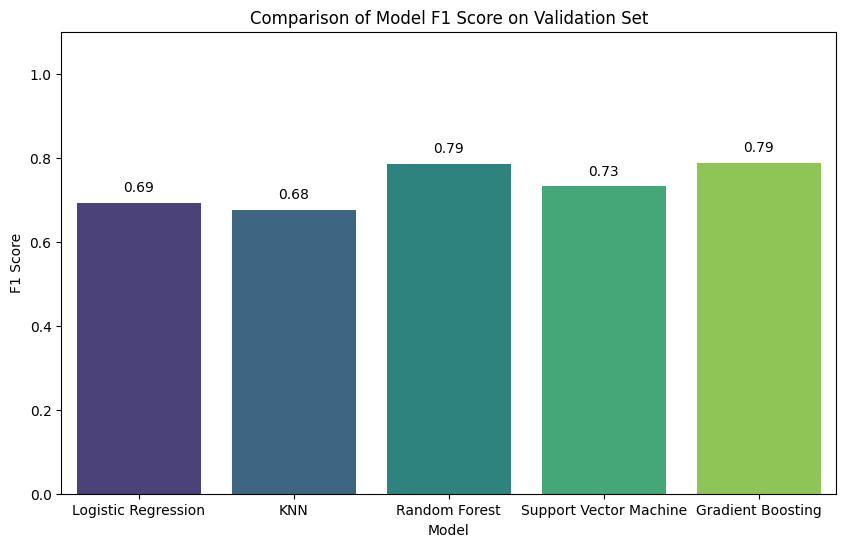

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score

# Collecting the results
results = {
    'Logistic Regression': grid_lr.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'Support Vector Machine': grid_svm.best_estimator_,
    'Gradient Boosting': grid_gb.best_estimator_
}

# Evaluate the models on the validation set
f1_scores = []
for model_name, model in results.items():
    val_predictions = model.predict(X_test)
    f1 = f1_score(y_test, val_predictions)
    f1_scores.append({'Model': model_name, 'F1 Score': f1})

# Create a DataFrame for plotting
df_f1 = pd.DataFrame(f1_scores)

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='F1 Score', data=df_f1, palette='viridis')
plt.title('Comparison of Model F1 Score on Validation Set')
plt.ylim(0, 1.1)

# Adding numbers on top of the bars
for index, value in enumerate(df_f1['F1 Score']):
    barplot.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()


## 12. <a name="12"> Data visualization</a>
Plots and charts

In [ ]:
# Visualize relationships between budget and revenue
fig = px.scatter(df, x="budget", y="gross",
                 color="score", #size = "votes",
                 animation_frame = "year",
                 facet_col = "success",
                 opacity = 0.8,
                 width=800, height=500,
                 range_x = [- 15*pow(10, 6), max(df["budget"]) + 15*pow(10, 6)],
                 range_y = [- 2*pow(10, 8), max(df["gross"]) + 2*pow(10, 8)],
                 trendline="ols",
                 hover_data = df[['name']],
                 labels={
                     "budget": "Budget of a movie",
                     "gross": "Revenue of the movie",
                     "score": "IMDb user rating",
                     "success": "Movie Success",
                     "year": "Year of release"
                 },
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title='Relationships between Movie Budget, Revenue, and Scores through the years')
fig.update_traces(marker=dict(size=10, line=dict(width=1,color='#E2E2E2')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
# Visualize relationships between budget and runtime
fig = px.scatter(df, x="runtime", y="budget",
                 color="score", #size = "budget",
                 facet_col = "success",
                 opacity = 0.8,
                 width=800, height=500,
                 trendline="ols",
                 hover_data = df[['name']],
                 labels={
                     "budget": "Budget of a movie",
                     "runtime": "Duration of the movie of the movie",
                     "score": "IMDb user rating",
                     "success": "Movie Success"
                 },
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title='Relationships between Movie Bbudget, Movie Duration, and Scores')
fig.update_traces(marker=dict(size=8, line=dict(width=1,color='#E2E2E2')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
# Visualize relationships between score and votes
fig = px.scatter(df, x="votes", y="score",
                 color="budget", size = "runtime",
                 facet_col = "success",
                 opacity = 0.6,
                 width=800, height=500,
                 log_x = True,
                 hover_data = df[['name']],
                 labels={
                     "budget": "Budget of a movie",
                     "runtime": "Duration of the movie",
                     "votes": "Number of user votes",
                     "score": "IMDb user rating",
                     "success": "Movie Success"
                 },
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title='Relationships between IMDb user Scores, Number of user votes, and Movie Budget')
fig.update_xaxes(matches=None)
fig.show()

In [ ]:
# Visualize the differences in the distribution of scores for successful and unsuccessful movies
fig=px.histogram(df, x='score', color='success',
                 opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box',
                 width=800, height=500,
                 labels={
                     "score": "IMDb user rating",
                     "success": "Movie Success"
                 },
                 color_discrete_sequence=['#4C78A8','#E45756'],
                 title="The differences in the distribution of IMDb user rating<br>for successful and unsuccessful movies")
fig.show()

In [ ]:
# Visualize the change in movie success through the years
fig=px.histogram(df, x='year', color='success',
                 opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box',
                 width=800, height=500,
                 labels={
                     "success": "Movie Success",
                     "year": "Year of release"
                 },
                 color_discrete_sequence=['#4C78A8','#E45756'],
                 title="The change in Movie Success through the years")
fig.show()

In [ ]:
# Visualize average budget for different ratings
fig = px.histogram(df, x='rating', y='budget',
                   #color='success',
                   barmode='group',
                   width=800, height=500,
                   histfunc = 'avg',
                   labels={
                     "budget": "Budget of a movie",
                     "success": "Movie Success",
                     "rating": "Rating of the movie"
                   },
                   color_discrete_sequence=['#4C78A8','#E45756'],
                   title='Comparison of Average Movie Budget for different Movie Ratings')
fig.show()

In [ ]:
# Visualize average budget for different genres
fig = px.histogram(df, x='genre', y='budget',
                   #color='success',
                   barmode='group',
                   width=800, height=500,
                   histfunc = 'avg',
                   labels={
                     "budget": "Budget of a movie",
                     "success": "Movie Success",
                     "genre": "Main genre of the movie"
                   },
                   color_discrete_sequence=['#4C78A8','#E45756'],
                   title='Comparison of Average Movie Budget for different Movie Genres')
fig.show()

In [ ]:
# Visualize average budget for different countries
fig = px.histogram(df, x='country', y='budget',
                   #color='success',
                   barmode='group',
                   width=800, height=500,
                   histfunc = 'avg',
                   labels={
                     "budget": "Budget of a movie",
                     "success": "Movie Success",
                     "country": "Country of origin"
                   },
                   color_discrete_sequence=['#4C78A8','#E45756'],
                   title='Comparison of Average Movie Budget for different Countries of origin')
fig.show()